In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = \
[[['Василий Захарыч', 'Гриша'],
  ['Василий Захарыч', 'Гриша', 'Лисатов'],
  ['Лисатов', 'Лиза', 'Гриша'],
  ['Лисатов', 'Лиза', 'Гриша', 'Василий Захарыч'],
  ['Лиза', 'Лисатов'],
  ['Лиза', 'Лисатов', 'Надежда Семеновна'],
  ['Мавра', 'Надежда Семеновна', 'Василий Захарыч'],
  ['Мавра', 'Надежда Семеновна'],
  ['Мавра', 'Надежда Семеновна', 'Повар'],
  ['Лидия', 'Заводецкий', 'Лиза', 'Петр Архипыч', 'Лисатов'],
  ['Лидия', 'Заводецкий', 'Лиза', 'Петр Архипыч', 'Лисатов'],
  ['Лиза', 'Лисатов', 'Василий Захарыч']],
 [['Мавра', 'Заводецкий'],
  ['Мавра', 'Заводецкий', 'Василий Захарыч'],
  ['Василий Захарыч', 'Заводецкий'],
  ['Василий Захарыч', 'Заводецкий', 'Петр Архипыч', 'Лидия'],
  ['Василий Захарыч', 'Лиза', 'Петр Архипыч'],
  ['Лиза', 'Петр Архипыч'],
  ['Лиза', 'Заводецкий', 'Лидия'],
  ['Лиза', 'Заводецкий', 'Лидия', 'Надежда Семеновна'],
  ['Лиза', 'Заводецкий', 'Лидия', 'Надежда Семеновна', 'Василий Захарыч'],
  ['Лиза', 'Заводецкий', 'Надежда Семеновна', 'Василий Захарыч']],
 [['Лиза'],
  ['Лиза', 'Заводецкий'],
  ['Заводецкий', 'Василий Захарыч'],
  ['Заводецкий', 'Мавра'],
  ['Заводецкий', 'Мавра', 'Василий Захарыч'],
  ['Мавра', 'Василий Захарыч'],
  ['Мавра', 'Василий Захарыч', 'Лиза'],
  ['Лиза', 'Василий Захарыч'],
  ['Лиза', 'Василий Захарыч', 'Заводецкий'],
  ['Лиза', 'Василий Захарыч', 'Заводецкий', 'Петр Архипыч', 'Лидия'],
  ['Лиза', 'Василий Захарыч', 'Заводецкий', 'Петр Архипыч', 'Лидия', 'Надежда Семеновна']],
 [['Лисатов', 'Лидия'],
  ['Лисатов', 'Лидия', 'Лиза'],
  ['Лисатов', 'Лиза'],
  ['Лисатов', 'Лидия', 'Василий Захарыч'],
  ['Лисатов', 'Заводецкий'],
  ['Василий Захарыч', 'Лидия'],
  ['Василий Захарыч', 'Лидия', 'Петр Архипыч'],
  ['Василий Захарыч', 'Лидия', 'Петр Архипыч', 'Надежда Семеновна', 'Лиза'],
  ['Василий Захарыч', 'Лидия', 'Петр Архипыч', 'Надежда Семеновна', 'Лиза', 'Лисатов'],
  ['Василий Захарыч', 'Лидия', 'Петр Архипыч', 'Надежда Семеновна', 'Лиза', 'Лисатов', 'Мавра', 'Заводецкий']]]


## Матрица

In [3]:
drama_heroes = [hero for act in data for scene in act for hero in scene]
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [4]:
def rome(dec):
    return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[dec]

def col(act, scene):
    return rome(act) + '.' + str(scene)

def cols():
    return [col(n_act+1, n_scene+1) for n_act, act in enumerate(matrices) for n_scene in range(len(act[0]))]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=cols())

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,I.8,I.9,I.10,I.11,I.12,II.1,II.2,II.3,II.4,II.5,II.6,II.7,II.8,II.9,II.10,III.1,III.2,III.3,III.4,III.5,III.6,III.7,III.8,III.9,III.10,III.11,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6,IV.7,IV.8,IV.9,IV.10
Василий Захарыч,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,1,1
Гриша,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Заводецкий,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1
Лидия,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,1,1,1,1
Лиза,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1
Лисатов,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1
Мавра,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Надежда Семеновна,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
Петр Архипыч,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1
Повар,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Мобильность

In [5]:
def mob(mat):
    return (np.sum(np.abs(mat[:, 1:] - mat[:, :-1]), axis=1) - 1) / (len(mat[0])-1)

index = list(range(1, len(matrices) + 1)) + ['пьеса']
mobility = list(map(mob, matrices + [matrix]))
mobility = pd.DataFrame(mobility, index=index, columns=drama_heroes).round(2).transpose()
mobility[mobility < 0] = ''
mobility

,1,2,3,4,пьеса
Василий Захарыч,0.45,0.22,0.2,0.22,0.40
Гриша,0.00,,,,0.00
Заводецкий,0.09,0.11,0.2,0.22,0.29
Лидия,0.09,0.33,0,0.33,0.24
Лиза,0.18,0,0.1,0.22,0.24
Лисатов,0.18,,,0.11,0.14
Мавра,0.09,0,0.1,0,0.14
Надежда Семеновна,0.09,0,0,0,0.14
Петр Архипыч,0.09,0.11,0,0,0.14
Повар,0.09,,,,0.02


## Плотность

In [6]:
def dens(matrix):
#     print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

In [7]:
print('Плотность всей пьесы:', round(dens(matrix), 2))

act_d = list(map(dens, matrices))
act_d_ = np.array(act_d).reshape(-1, 1)
scene_d = [[dens(c) for c in m.T] for m in matrices]
scene_d_ = pd.DataFrame(scene_d).values # to fill with nans
columns = list(range(1, len(scene_d_[0]) + 1)) + ['действия']
index = list(range(1, len(data)+1))
density = pd.DataFrame(np.hstack((scene_d_, act_d_)), columns=columns, index=index)
density.round(2).fillna('')

Плотность всей пьесы: 0.32


,1,2,3,4,5,6,7,8,9,10,11,12,действия
1,0.2,0.3,0.3,0.4,0.2,0.3,0.3,0.2,0.3,0.5,0.5,0.3,0.32
2,0.2,0.3,0.2,0.4,0.3,0.2,0.3,0.4,0.5,0.4,,,0.32
3,0.1,0.2,0.2,0.2,0.3,0.2,0.3,0.2,0.3,0.5,0.6,,0.28
4,0.2,0.3,0.2,0.3,0.2,0.2,0.3,0.5,0.6,0.8,,,0.36


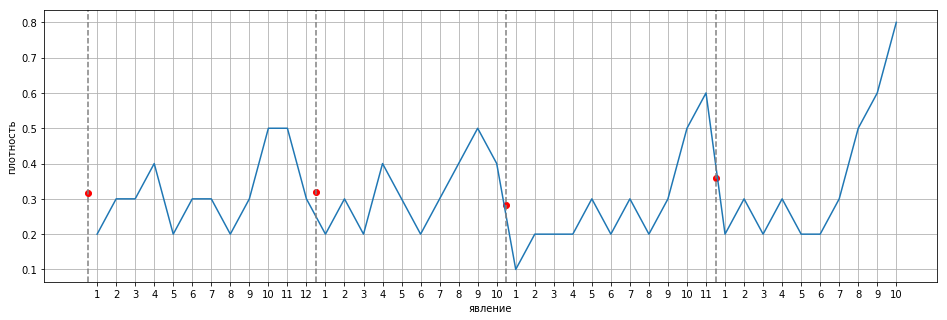

In [8]:
from itertools import accumulate

plt.subplots(figsize=(16, 5));

flat = [tup for act in scene_d for tup in enumerate(act, start=1)]
ticks, values = zip(*flat)
plt.plot(values);
plt.xticks(range(len(ticks)), ticks);

borders = np.array(list(accumulate(map(len, [[]] + scene_d))))
plt.scatter(borders[:-1]-0.5, act_d, c='red');
for x in borders[:-1]:
    plt.axvline(x-0.5, c='gray', ls='--');
    
plt.xlabel('явление');
plt.ylabel('плотность');
plt.grid();

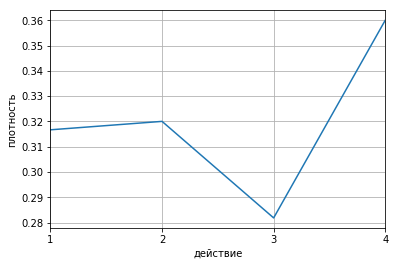

In [9]:
plt.plot(act_d)
plt.grid();
plt.xlabel('действие');
plt.ylabel('плотность');
plt.xticks(range(len(act_d)+1), range(1, len(act_d)+1));
plt.xlim([0, len(act_d)-1]);

## Расстояние

In [10]:
def dist(mat):
    n = len(drama_heroes)
    dist = np.zeros((n, n))*np.nan
    for i in range(n-1):
        for j in range(i+1, n):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = dist[j][i] = np.sum(np.abs(mat[i] - mat[j]))
    return dist/len(mat[0])

In [11]:
act_d = [dist(m) for m in matrices]
drama_d = dist(matrix)

In [12]:
distances = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in act_d + [drama_d]]
distances = pd.concat(distances, axis=1)
distances.columns = list(range(1, len(act_d) + 1)) + ['пьеса']
distances.round(2).fillna('')

1    2     3    4  пьеса
Василий Захарыч   Гриша              0.25                   0.53
                  Заводецкий         0.58  0.4  0.45  0.6   0.51
                  Лидия              0.58  0.6  0.55  0.2   0.49
                  Лиза               0.67  0.6  0.45  0.5   0.56
                  Лисатов            0.58             0.7   0.65
                  Мавра              0.50  0.6  0.55  0.5   0.53
                  Надежда Семеновна  0.58  0.5  0.64  0.3   0.51
                  Петр Архипыч       0.58  0.5  0.55  0.2   0.47
                  Повар              0.50                   0.60
Гриша             Василий Захарыч    0.25                   0.53
                  Заводецкий         0.50                   0.53
                  Лидия              0.50                   0.47
                  Лиза               0.58                   0.58
                  Лисатов            0.50                   0.30
                  Мавра              0.58                   0.33
                  Надежда Семеновна  0.67                   0.35
                  Петр Архипыч       0.50                   0.35
                  Повар              0.42                   0.12
Заводецкий        Василий Захарыч    0.58  0.4  0.45  0.6   0.51
                  Гриша              0.50                   0.53
                  Лидия              0.00  0.4  0.45  0.8   0.40
                  Лиза               0.42  0.6  0.55  0.5   0.51
                  Лисатов            0.50             0.5   0.60
                  Мавра              0.42  0.6  0.64  0.1   0.44
                  Надежда Семеновна  0.50  0.5  0.55  0.3   0.47
                  Петр Архипыч       0.00  0.9  0.45  0.4   0.42
                  Повар              0.25                   0.47
Лидия             Василий Захарыч    0.58  0.6  0.55  0.2   0.49
                  Гриша              0.50                   0.47
                  Заводецкий         0.00  0.4  0.45  0.8   0.40
                  Лиза               0.42  0.4  0.45  0.5   0.44
                  Лисатов            0.50             0.5   0.40
                  Мавра              0.42  0.6  0.55  0.7   0.56
                  Надежда Семеновна  0.50  0.3  0.09  0.5   0.35
                  Петр Архипыч       0.00  0.5     0  0.4   0.21
                  Повар              0.25                   0.40
Лиза              Василий Захарыч    0.67  0.6  0.45  0.5   0.56
                  Гриша              0.58                   0.58
                  Заводецкий         0.42  0.6  0.55  0.5   0.51
                  Лидия              0.42  0.4  0.45  0.5   0.44
                  Лисатов            0.08             0.4   0.42
                  Мавра              0.83  0.8  0.82  0.4   0.72
                  Надежда Семеновна  0.75  0.3  0.55  0.2   0.47
                  Петр Архипыч       0.42  0.5  0.45  0.3   0.42
                  Повар              0.67                   0.60
Лисатов           Василий Захарыч    0.58             0.7   0.65
                  Гриша              0.50                   0.30
                  Заводецкий         0.50             0.5   0.60
                  Лидия              0.50             0.5   0.40
                  Лиза               0.08             0.4   0.42
                  Мавра              0.92             0.6   0.53
                  Надежда Семеновна  0.83             0.6   0.47
                  Петр Архипыч       0.50             0.7   0.42
                  Повар              0.75                   0.37
Мавра             Василий Захарыч    0.50  0.6  0.55  0.5   0.53
                  Гриша              0.58                   0.33
                  Заводецкий         0.42  0.6  0.64  0.1   0.44
                  Лидия              0.42  0.6  0.55  0.7   0.56
                  Лиза               0.83  0.8  0.82  0.4   0.72
                  Лисатов            0.92             0.6   0.53
                  Надежда Семеновна  0.08  0.5  0.45  0.2   0.30
          

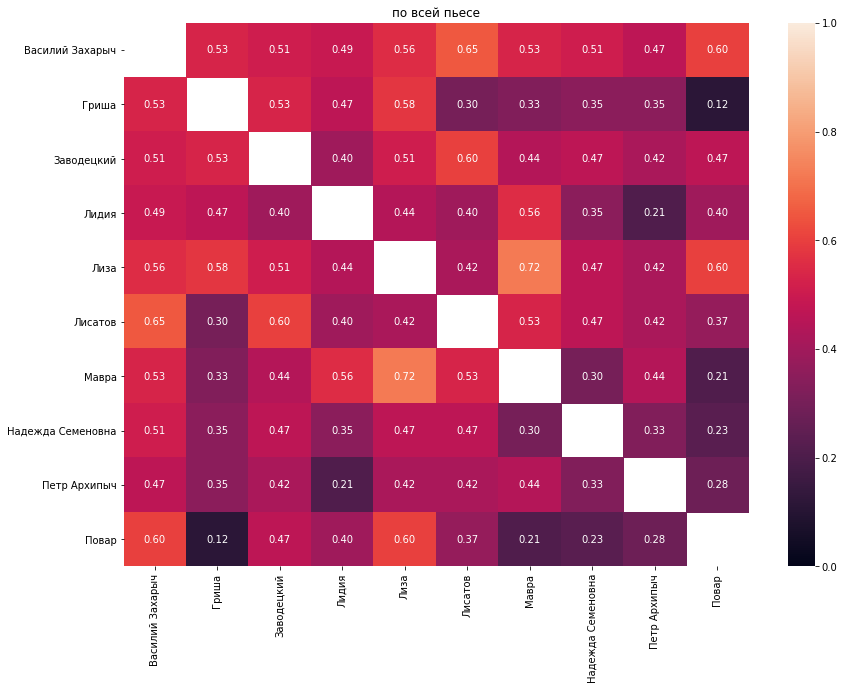

In [13]:
plt.subplots(figsize=(14, 10))
sns.heatmap(drama_d, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [14]:
for i, j in zip(*np.where(drama_d == 0)):
    if i != j and i < j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

## Ранг

In [15]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]
df = pd.DataFrame(dict(zip(drama_heroes, rank)), index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)

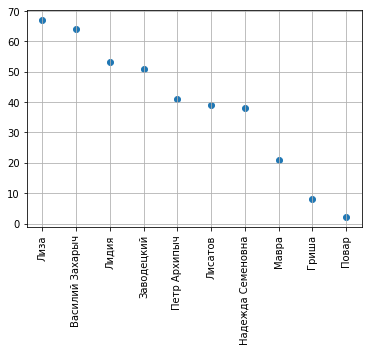

In [16]:
plt.scatter(range(len(drama_heroes)), df.values);
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90);
plt.grid();

In [17]:
df

,Лиза,Василий Захарыч,Лидия,Заводецкий,Петр Архипыч,Лисатов,Надежда Семеновна,Мавра,Гриша,Повар
ранг,67,64,53,51,41,39,38,21,8,2


## Абсолютные относительные частоты

In [18]:
def freq(mat):
    return np.sum(mat, axis=1)/len(mat[0])

index = list(range(1, len(matrices) + 1)) + ['пьеса']
freq_abs = list(map(freq, matrices + [matrix]))
freq_abs = pd.DataFrame(freq_abs, index=index, columns=drama_heroes).round(2).transpose()
freq_abs[freq_abs == 0] = ''
freq_abs.sort_values(by='пьеса', ascending=False)

,1,2,3,4,пьеса
Василий Захарыч,0.42,0.6,0.73,0.6,0.58
Лиза,0.58,0.6,0.64,0.5,0.58
Заводецкий,0.17,0.8,0.64,0.2,0.44
Лидия,0.17,0.4,0.18,0.8,0.37
Лисатов,0.67,,,0.7,0.35
Надежда Семеновна,0.33,0.3,0.09,0.3,0.26
Петр Архипыч,0.17,0.3,0.18,0.4,0.26
Мавра,0.25,0.2,0.36,0.1,0.23
Гриша,0.33,,,,0.09
Повар,0.08,,,,0.02


## Условные относительные частоты

In [19]:
def rel_freq(mat):
    busyness = np.sum(mat, axis=1)
    freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
    for i in range(len(mat)):
        for j in range(len(mat)):
            if busyness[j] == 0 or i == j:
                freq_rel[i, j] = np.nan
            else:
                freq_rel[i, j] = np.count_nonzero(mat[i] + mat[j] - 2 == 0)/busyness[j]
    return freq_rel

for i, m in enumerate(matrices):
    print('Действие', i+1)
    pd.DataFrame(rel_freq(m), index=drama_heroes, columns=drama_heroes).round(2).fillna('')
    
print('По всей пьесе')
pd.DataFrame(rel_freq(matrix), index=drama_heroes, columns=drama_heroes).round(2).fillna('')

Действие 1


,Василий Захарыч,Гриша,Заводецкий,Лидия,Лиза,Лисатов,Мавра,Надежда Семеновна,Петр Архипыч,Повар
Василий Захарыч,,0.75,0,0,0.29,0.38,0.33,0.25,0,0
Гриша,0.6,,0,0,0.29,0.38,0,0,0,0
Заводецкий,0,0,,1,0.29,0.25,0,0,1,0
Лидия,0,0,1,,0.29,0.25,0,0,1,0
Лиза,0.4,0.5,1,1,,0.88,0,0.25,1,0
Лисатов,0.6,0.75,1,1,1,,0,0.25,1,0
Мавра,0.2,0,0,0,0,0,,0.75,0,1
Надежда Семеновна,0.2,0,0,0,0.14,0.12,1,,0,1
Петр Архипыч,0,0,1,1,0.29,0.25,0,0,,0
Повар,0,0,0,0,0,0,0.33,0.25,0,


Действие 2


,Василий Захарыч,Гриша,Заводецкий,Лидия,Лиза,Лисатов,Мавра,Надежда Семеновна,Петр Архипыч,Повар
Василий Захарыч,,,0.62,0.5,0.5,,0.5,0.67,0.67,
Гриша,0,,0,0,0,,0,0,0,
Заводецкий,0.83,,,1,0.67,,1,1,0.33,
Лидия,0.33,,0.5,,0.5,,0,0.67,0.33,
Лиза,0.5,,0.5,0.75,,,0,1,0.67,
Лисатов,0,,0,0,0,,0,0,0,
Мавра,0.17,,0.25,0,0,,,0,0,
Надежда Семеновна,0.33,,0.38,0.5,0.5,,0,,0,
Петр Архипыч,0.33,,0.12,0.25,0.33,,0,0,,
Повар,0,,0,0,0,,0,0,0,


Действие 3


,Василий Захарыч,Гриша,Заводецкий,Лидия,Лиза,Лисатов,Мавра,Надежда Семеновна,Петр Архипыч,Повар
Василий Захарыч,,,0.71,1,0.71,,0.75,1,1,
Гриша,0,,0,0,0,,0,0,0,
Заводецкий,0.62,,,1,0.57,,0.5,1,1,
Лидия,0.25,,0.29,,0.29,,0,1,1,
Лиза,0.62,,0.57,1,,,0.25,1,1,
Лисатов,0,,0,0,0,,0,0,0,
Мавра,0.38,,0.29,0,0.14,,,0,0,
Надежда Семеновна,0.12,,0.14,0.5,0.14,,0,,0.5,
Петр Архипыч,0.25,,0.29,1,0.29,,0,1,,
Повар,0,,0,0,0,,0,0,0,


Действие 4


,Василий Захарыч,Гриша,Заводецкий,Лидия,Лиза,Лисатов,Мавра,Надежда Семеновна,Петр Архипыч,Повар
Василий Захарыч,,,0.5,0.75,0.6,0.43,1,1,1,
Гриша,0,,0,0,0,0,0,0,0,
Заводецкий,0.17,,,0.12,0.2,0.29,1,0.33,0.25,
Лидия,1,,0.5,,0.8,0.71,1,1,1,
Лиза,0.5,,0.5,0.5,,0.57,1,1,0.75,
Лисатов,0.5,,1,0.62,0.8,,1,0.67,0.5,
Мавра,0.17,,0.5,0.12,0.2,0.14,,0.33,0.25,
Надежда Семеновна,0.5,,0.5,0.38,0.6,0.29,1,,0.75,
Петр Архипыч,0.67,,0.5,0.5,0.6,0.29,1,1,,
Повар,0,,0,0,0,0,0,0,0,


По всей пьесе


,Василий Захарыч,Гриша,Заводецкий,Лидия,Лиза,Лисатов,Мавра,Надежда Семеновна,Петр Архипыч,Повар
Василий Захарыч,,0.75,0.58,0.62,0.52,0.4,0.6,0.64,0.73,0
Гриша,0.12,,0,0,0.08,0.2,0,0,0,0
Заводецкий,0.44,0,,0.56,0.44,0.27,0.5,0.45,0.55,0
Лидия,0.4,0,0.47,,0.44,0.47,0.1,0.55,0.82,0
Лиза,0.52,0.5,0.58,0.69,,0.73,0.2,0.73,0.82,0
Лисатов,0.24,0.75,0.21,0.44,0.44,,0.1,0.27,0.36,0
Мавра,0.24,0,0.26,0.06,0.08,0.07,,0.36,0.09,1
Надежда Семеновна,0.28,0,0.26,0.38,0.32,0.2,0.4,,0.36,1
Петр Архипыч,0.32,0,0.32,0.56,0.36,0.27,0.1,0.36,,0
Повар,0,0,0,0,0,0,0.1,0.09,0,


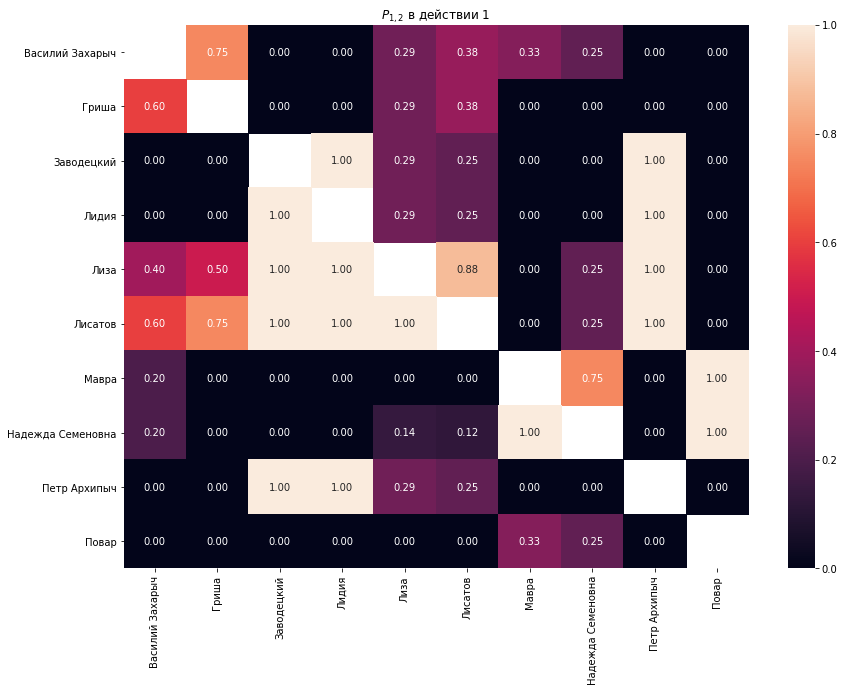

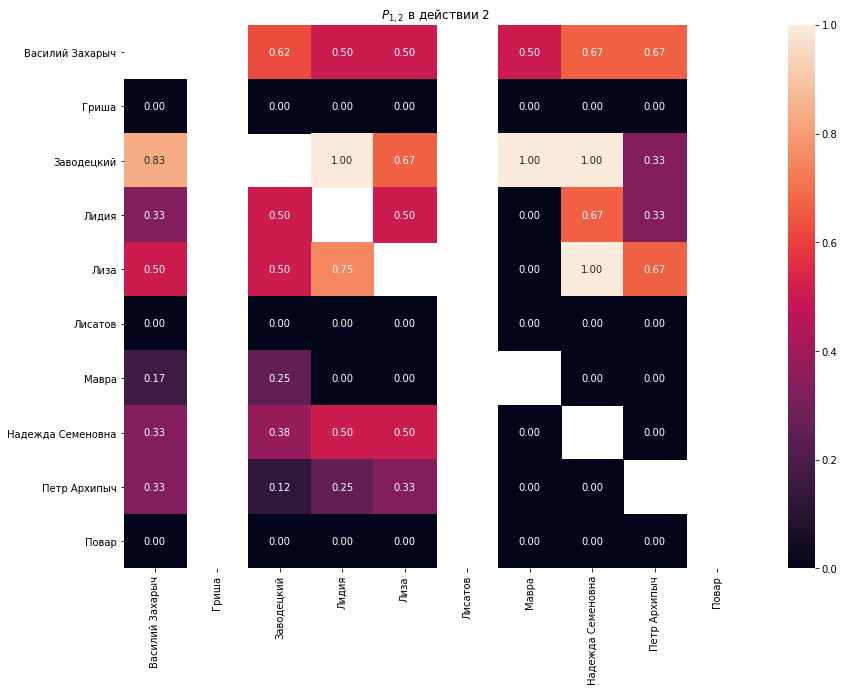

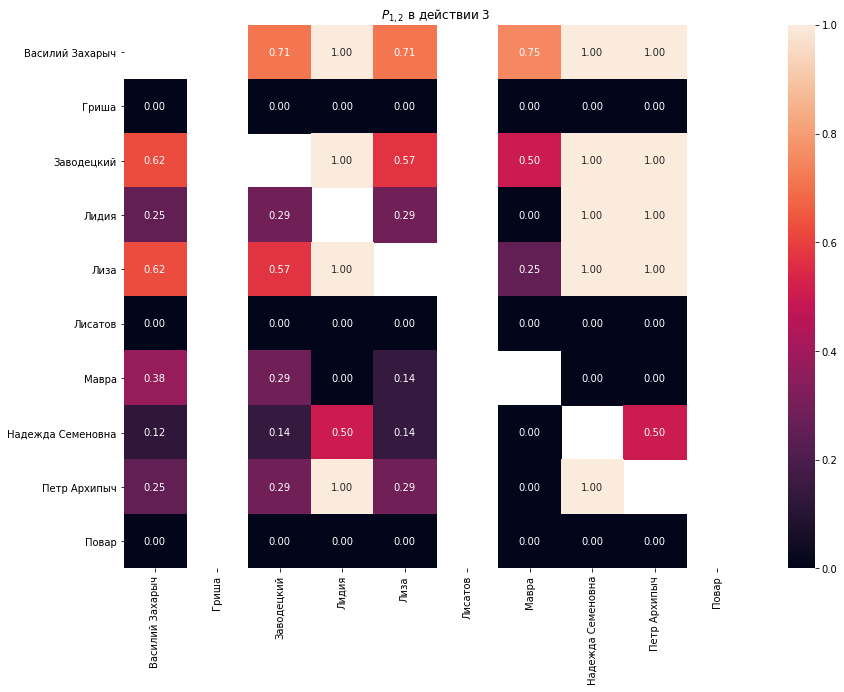

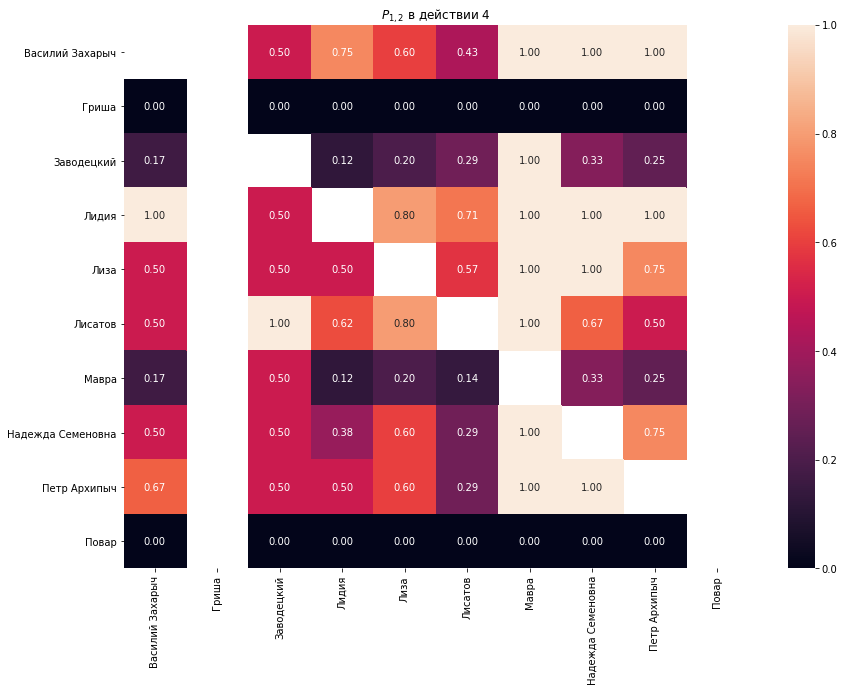

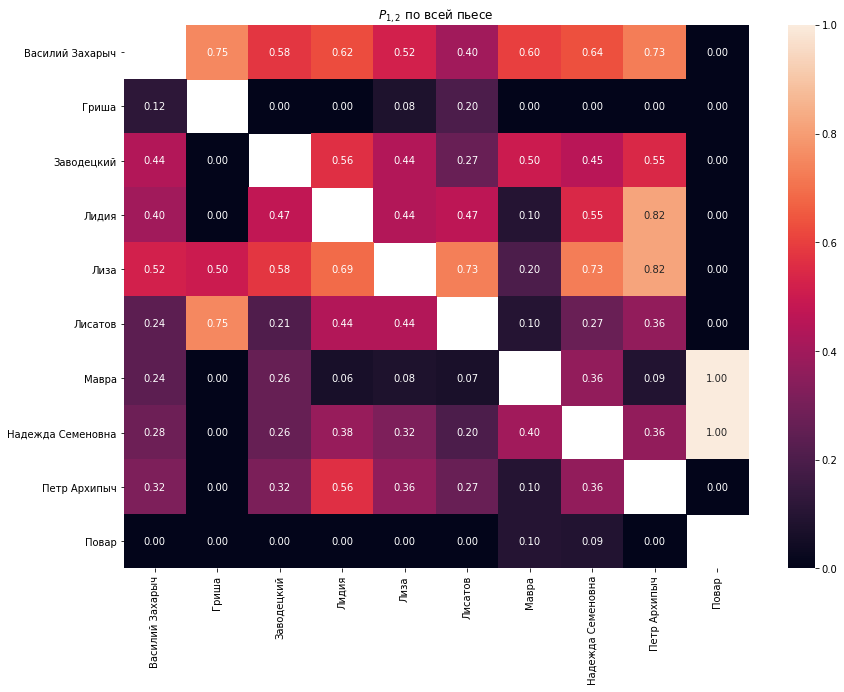

In [20]:
for i, m in enumerate(matrices):
    plt.subplots(figsize=(14, 10))
    sns.heatmap(rel_freq(m), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
    plt.title(r"$P_{1,2}$ в действии " + str(i+1));

plt.subplots(figsize=(14, 10))
sns.heatmap(rel_freq(matrix), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title(r"$P_{1,2}$ по всей пьесе");

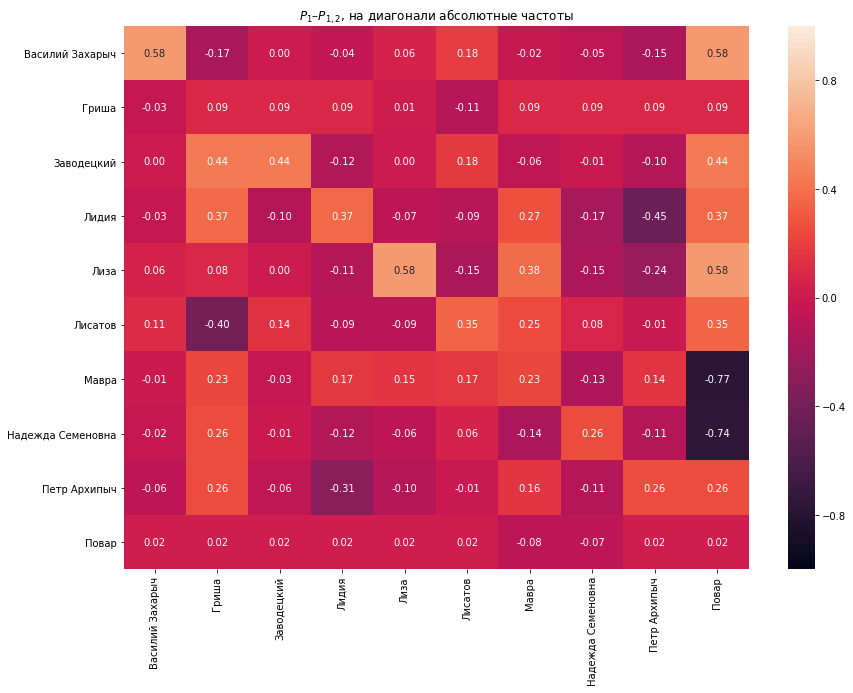

In [21]:
freq_abs = freq(matrix).reshape((-1, 1))
freq_rel = rel_freq(matrix)
freq_ = freq_abs - freq_rel
freq_[np.diag_indices(len(freq_[0]))] = freq_abs.ravel()
plt.subplots(figsize=(14, 10))
sns.heatmap(freq_, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f', vmin=-1, vmax=1)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");